In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import sys
import numpy as np
from scipy.signal import find_peaks
from tools import feature_extraction, table

### load_data: loads data from the given path. can work with interpolated, accel, or imu data.
Parameters: 
path: Path to the data directory.
Returns:
 df: A dataframe. This dataframe will be different, wheter we are passing in imu data, accel data, or interpolated/merged data

In [2]:

def load_data(file_name):
    # the tap strap has 5 xyz accelerometers
    # and a imu on the thumb. The 
    data = []
    with open(file_name, 'r') as f:
        for line in f:
            data.append(json.loads(line))
    df = pd.DataFrame(data)
    # Break payload into separate columns
    if all(len(i) == 15 for i in df['payload']): # case we are loading in data from the general tap strap 
        df[['thumb_x', 'thumb_y', 'thumb_z', 'index_x', 'index_y', 'index_z', 'middle_x', 'middle_y', 'middle_z', 
            'ring_x', 'ring_y', 'ring_z', 'pinky_x', 'pinky_y', 'pinky_z']] = pd.DataFrame(df['payload'].values.tolist(), index=df.index)
    elif all(len(i) == 6 for i in df['payload']): # case we are loading in imu data for the thumb 
        df[['thumb_imu_x', 'thumb_imu_y', 'thumb_imu_z', 'thumb_imu_pitch', 'thumb_imu_yaw', 'thumb_imu_roll',
            ]] = pd.DataFrame(df['payload'].values.tolist(), index=df.index)
    elif all(len(i) == 21 for i in df['payload']): # case we are loading in merged/interpolated data 
        df[['thumb_imu_x', 'thumb_imu_y', 'thumb_imu_z', 'thumb_imu_pitch', 'thumb_imu_yaw', 'thumb_imu_roll', 'thumb_x', 'thumb_y', 'thumb_z', 'index_x', 'index_y', 'index_z', 'middle_x', 'middle_y', 'middle_z', 
            'ring_x', 'ring_y', 'ring_z', 'pinky_x', 'pinky_y', 'pinky_z' ,
            ]] = pd.DataFrame(df['payload'].values.tolist(), index=df.index)
    else:
        print("Some payloads do not have the expected length of 15 or 6.")
    
    # Drop the original 'payload' column
    df = df.drop(columns=['payload'])
    df
    return df


In [3]:
def calculate_statistics(df):
    # List of fingers and axes
    fingers = ['thumb', 'index', 'middle', 'ring', 'pinky']
    axes = ['x', 'y', 'z']
    
    # Calculate mean and std for each finger's coordinates
    for finger in fingers:
        for axis in axes:
            df[f'{finger}_{axis}_mean'] = df[f'{finger}_{axis}'].mean()
            df[f'{finger}_{axis}_std'] = df[f'{finger}_{axis}'].std()
    
    return df

def plot_data(df, title):
    # List of fingers and axes
    fingers = ['thumb', 'index', 'middle', 'ring', 'pinky']
    axes = ['x', 'y', 'z']
    
    plt.figure(figsize=(10, 5))
    calculate_statistics(df)
    
    for finger in fingers:
        for axis in axes:
            plt.plot(df['timestamp'], df[f'{finger}_{axis}_mean'], label=f'{finger}_{axis}')
    
    plt.title(title)
    plt.xlabel('Timestamp')
    plt.ylabel('Mean Value')
    plt.legend()
    plt.show()

# plot_data(imu_df, 'IMU Data')


### Extensive Plots: will plot the data for each gesture in a separate plot, with the x-axis being the time and the y-axis being the value of the sensor. This will help you visualize the data and get a better understanding of the data.

In [4]:
import matplotlib.pyplot as plt
def extensive_plot_helper(df, x,y_list, folder_name=''):
    plt.figure(figsize=(14,6))
    for y in y_list:
         plt.plot(df[x], df[y], label=y)
    # take y list and turn into a string
    y_list = ', '.join(y_list)
    plt.title(folder_name + " " + str(y_list) + " over time")
    plt.xlabel('Timestamp')
    plt.ylabel('Values')
    plt.legend()

def extensive_plots(accel_df,imu_df, interpolated, folder_name=''): 

    extensive_plot_helper(interpolated, 'timestamp', ['thumb_imu_x', 'thumb_imu_y', 'thumb_imu_z', 'thumb_imu_pitch', 'thumb_imu_yaw', 'thumb_imu_roll'], folder_name + " interpolated")
    extensive_plot_helper(imu_df, 'timestamp', ['thumb_imu_x', 'thumb_imu_y', 'thumb_imu_z', 'thumb_imu_pitch', 'thumb_imu_yaw', 'thumb_imu_roll'], folder_name + " imu")
    extensive_plot_helper(accel_df, 'timestamp', ['thumb_x', 'thumb_y', 'thumb_z'], folder_name + " accel")
    # Do the same for the rest of the fingers
    extensive_plot_helper(accel_df, 'timestamp', ['index_x', 'index_y', 'index_z'], folder_name + " accel")
    # Similarly for middle, ring, and pinky fingers...
    extensive_plot_helper(accel_df, 'timestamp', ['middle_x', 'middle_y', 'middle_z'], folder_name + " accel")
    extensive_plot_helper(accel_df, 'timestamp', ['pinky_x', 'pinky_y', 'pinky_z'], folder_name + " accel")
    extensive_plot_helper(accel_df, 'timestamp', ['pinky_x', 'pinky_y', 'pinky_z'], folder_name + " accel")


/Users/benv/Desktop/Tap Strap/firefighter-software/tapstrap_new


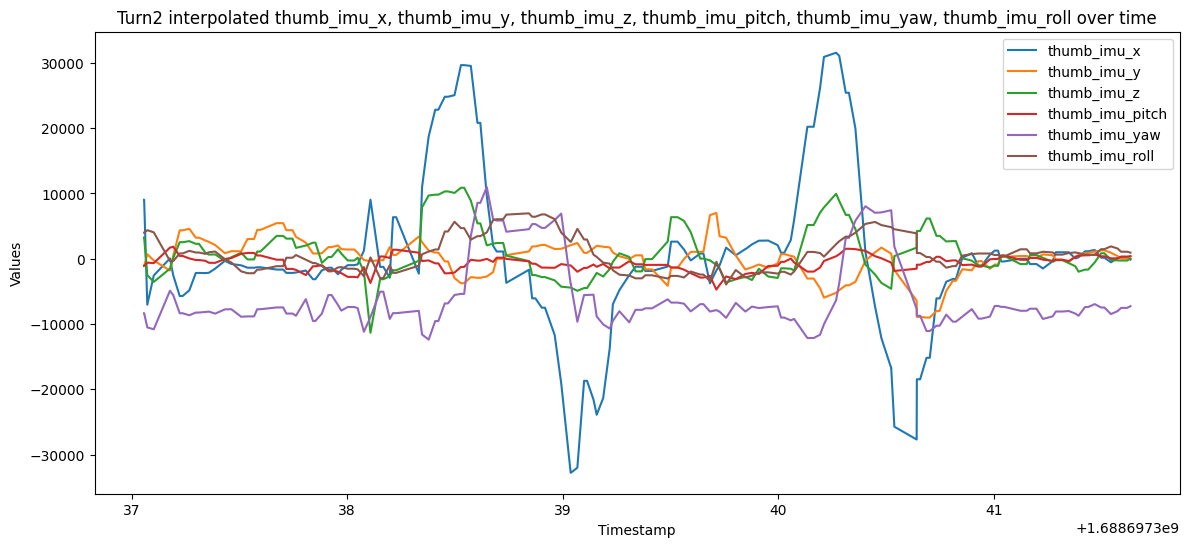

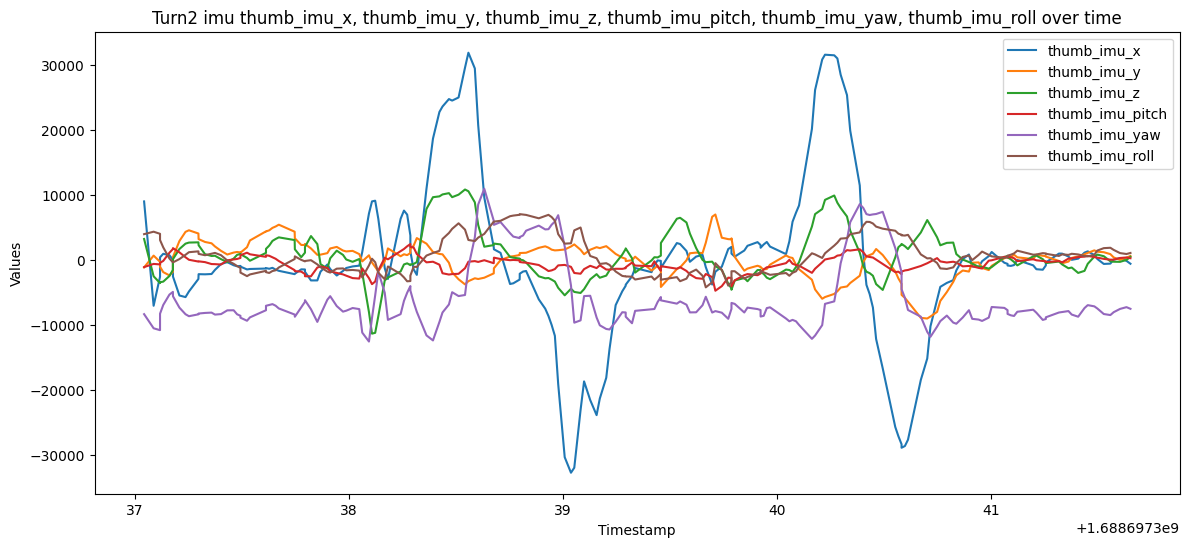

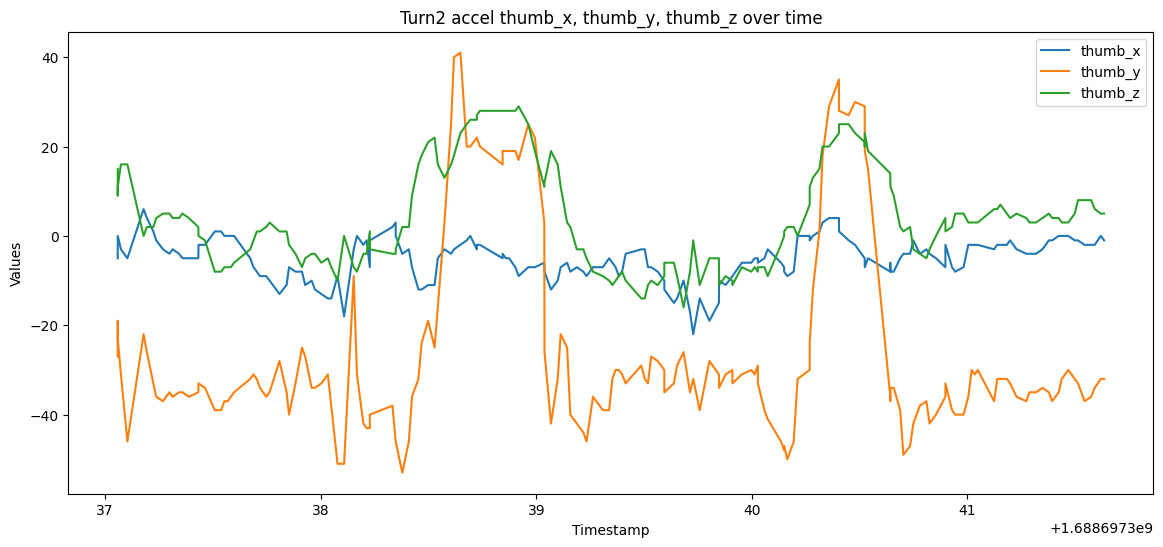

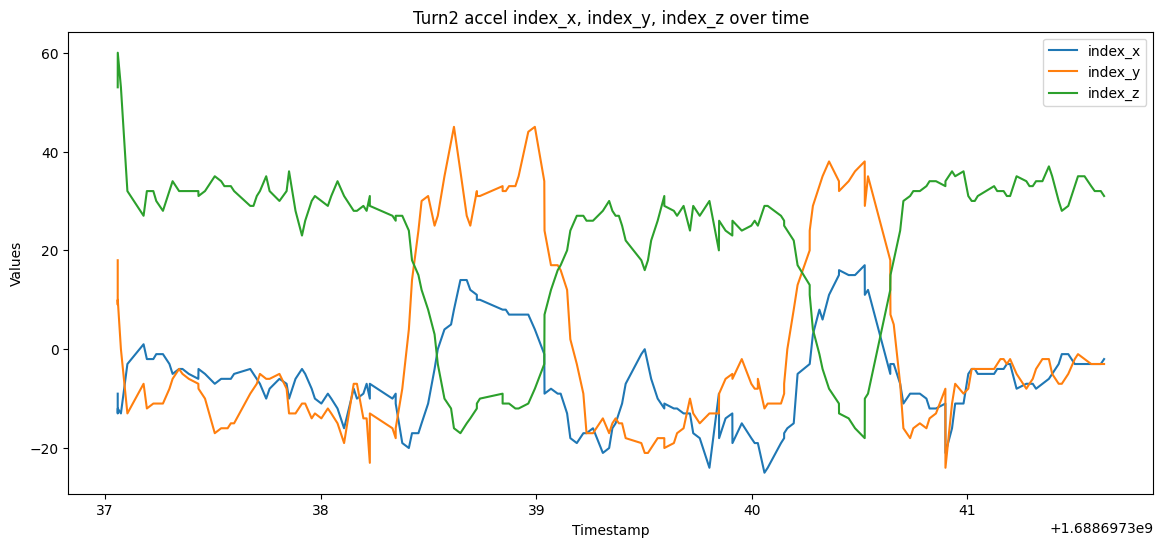

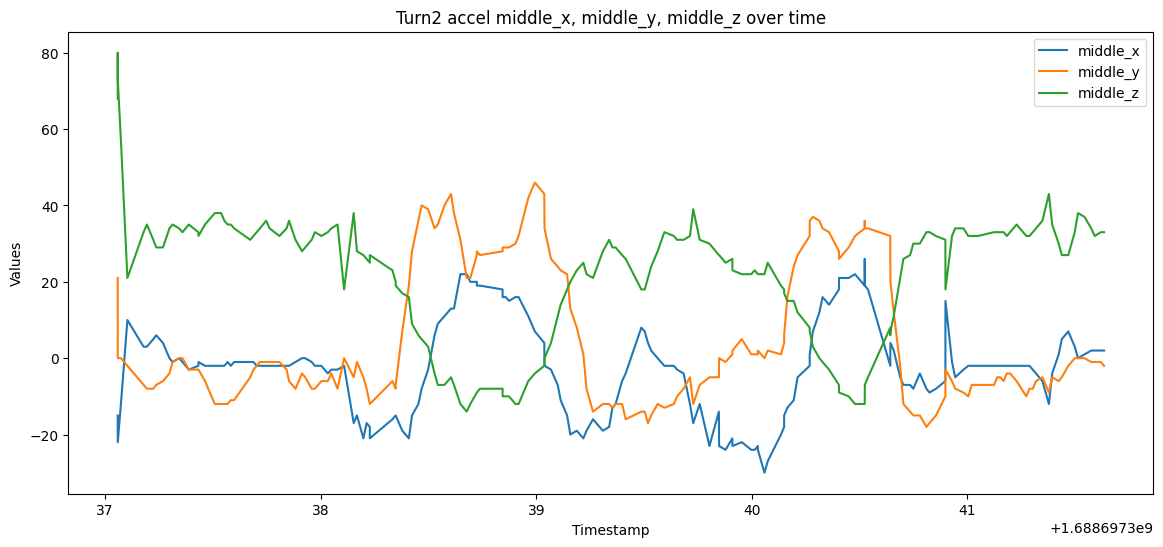

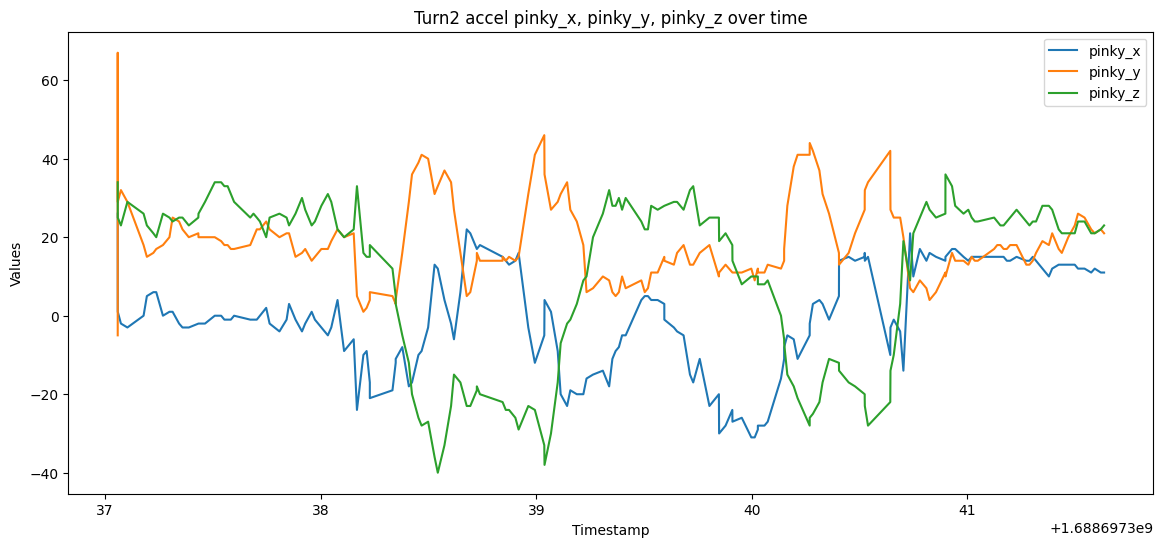

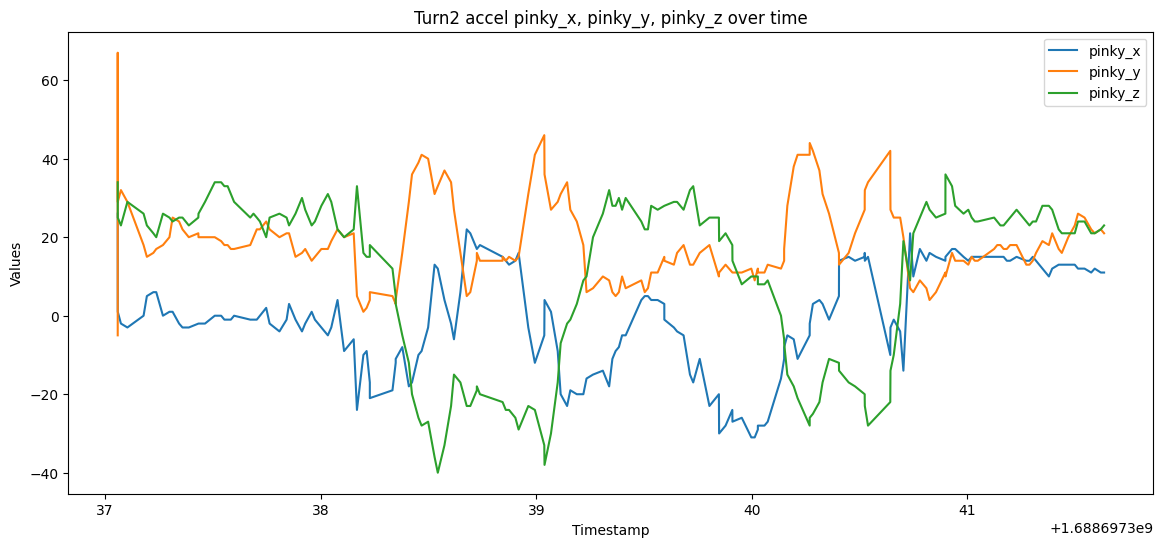

In [5]:
# Load IMU and accelerometer data
# print current directory
print(sys.path[0])
# interpolated test

interpolated_df = load_data('./training_data/data/Turn2/merged_data.json')
imu_df = load_data('./training_data/data/Turn2/imu_data.json')
test_accel_df = load_data('./training_data/data/Turn2/accel_data.json')
extensive_plots(test_accel_df,imu_df, interpolated_df, folder_name='Turn2')


### plot_3d: will plot the data in 3d. This will help you visualize the data and get a better understanding of the data.

In [6]:
from mpl_toolkits.mplot3d import Axes3D

def plot_scatter(df, finger ):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # make thumb_x red, thumb_y green, thumb_z blue
    ax.scatter(df[f'{finger}_x'], df[f'{finger}_y'], df[f'{finger}_z'])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.title("f'{finger} IMU Values")
    plt.show()

def plot_3d(df):
    plot_scatter(df, 'thumb')
    plot_scatter(df, 'index')
    plot_scatter(df, 'middle')
    plot_scatter(df, 'ring')
    plot_scatter(df, 'pinky')


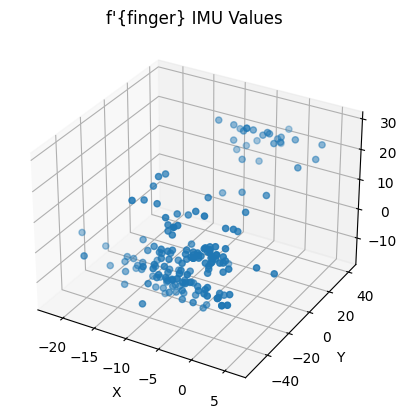

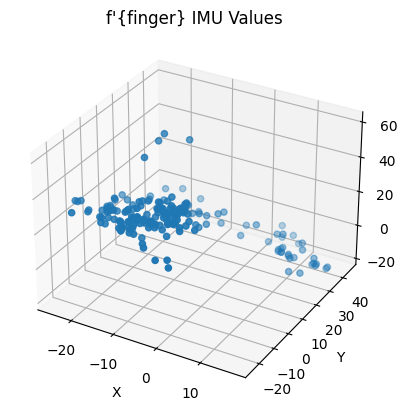

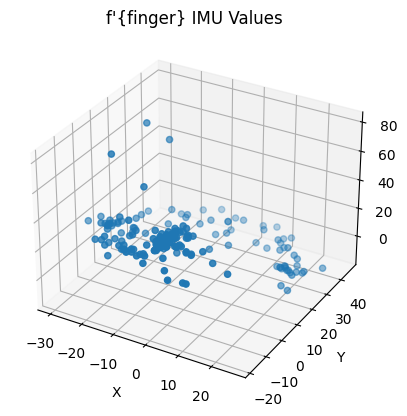

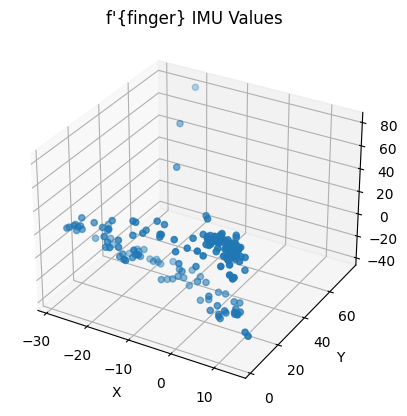

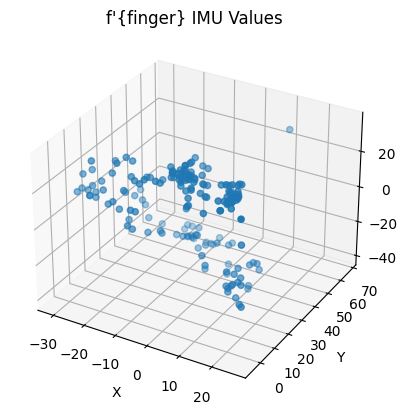

In [7]:
plot_3d(interpolated_df)

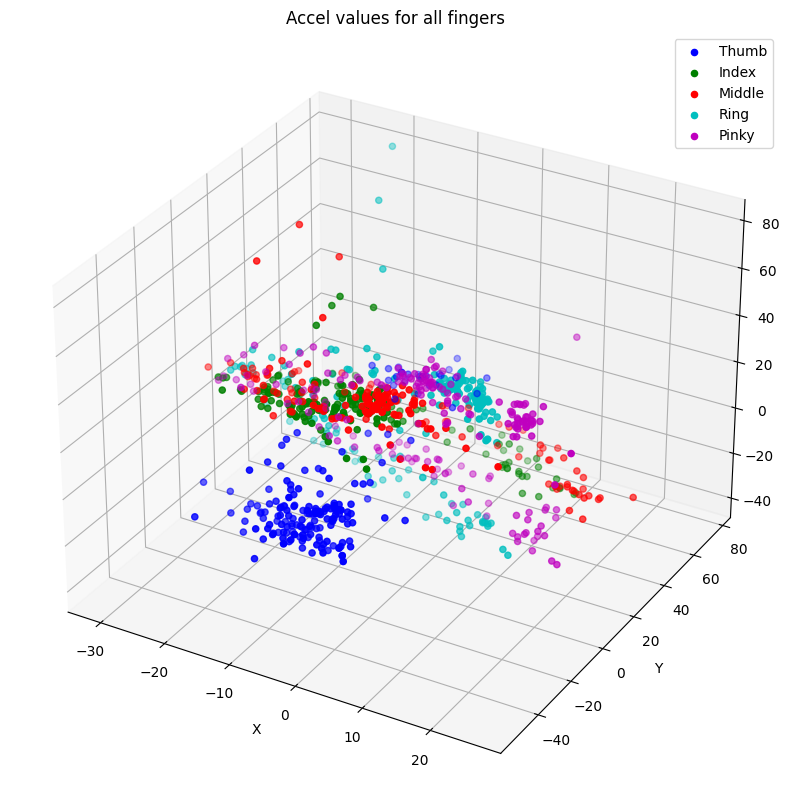

In [8]:
def plot_all(accel_df):

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Thumb
    ax.scatter(accel_df['thumb_x'], accel_df['thumb_y'], accel_df['thumb_z'], c='b', label='Thumb')

    # Index
    ax.scatter(accel_df['index_x'], accel_df['index_y'], accel_df['index_z'], c='g', label='Index')

    # Middle
    ax.scatter(accel_df['middle_x'], accel_df['middle_y'], accel_df['middle_z'], c='r', label='Middle')

    # Ring
    ax.scatter(accel_df['ring_x'], accel_df['ring_y'], accel_df['ring_z'], c='c', label='Ring')

    # Pinky
    ax.scatter(accel_df['pinky_x'], accel_df['pinky_y'], accel_df['pinky_z'], c='m', label='Pinky')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.legend()
    plt.title('Accel values for all fingers')
    plt.show()

plot_all(test_accel_df)

In [9]:
# Repeat the same calculation for other fingers
# Average acceleration magnitude pe
# avg_accel_mag = ((imu_df[['thumb_x', 'thumb_y', 'thumb_z']]**2).sum(axis=1)**0.5).mean()
# print all of the features

In [10]:
# Define list of fingers
fingers = ['thumb', 'index', 'middle', 'ring', 'pinky']

# List to hold features
features = ['thumb_x', 'thumb_y', 'thumb_z', 'index_x', 'index_y', 'index_z', 
            'middle_x', 'middle_y', 'middle_z', 'ring_x', 'ring_y', 'ring_z', 
            'pinky_x', 'pinky_y', 'pinky_z']


In [11]:
# final_features = feature_extraction(accel_df)
feature_extraction(test_accel_df, use_label=True)


skew_thumb_x  skew_thumb_y  skew_thumb_z  skew_index_x  skew_index_y   
0     -0.620545      1.668227      0.648134      0.582211      1.008356  \

   skew_index_z  skew_middle_x  skew_middle_y  skew_middle_z  skew_ring_x   
0     -1.115806       0.141584       0.876388      -0.362481    -0.728477  \

   skew_ring_y  skew_ring_z  skew_pinky_x  skew_pinky_y  skew_pinky_z   
0     1.789841    -0.648535      -0.42438      1.027998     -0.820461  \

   kurtosis_thumb_x  kurtosis_thumb_y  kurtosis_thumb_z  kurtosis_index_x   
0          0.770273          1.580195          -0.41975          0.194939  \

   kurtosis_index_y  kurtosis_index_z  kurtosis_middle_x  kurtosis_middle_y   
0         -0.342756           0.51574          -0.311759          -0.692928  \

   kurtosis_middle_z  kurtosis_ring_x  kurtosis_ring_y  kurtosis_ring_z   
0            0.61156        -0.775648         8.811428        -0.499532  \

   kurtosis_pinky_x  kurtosis_pinky_y  kurtosis_pinky_z  avg_accel_thumb_x   
0          -0.56655          2.045015         -0.892752          -5.129032  \

   avg_accel_thumb_y  avg_accel_thumb_z  avg_accel_index_x  avg_accel_index_y   
0         -25.704301           3.806452          -6.225806            0.38172  \

   avg_accel_index_z  avg_accel_middle_x  avg_accel_middle_y   
0          21.887097           -2.865591            4.456989  \

   avg_accel_middle_z  avg_accel_ring_x  avg_accel_ring_y  avg_accel_ring_z   
0                22.0         -3.198925         18.731183         12.284946  \

   avg_accel_pinky_x  avg_accel_pinky_y  avg_accel_pinky_z   
0           -0.16129          18.924731          10.215054  \

   std_dev_accel_thumb_x  std_dev_accel_thumb_y  std_dev_accel_thumb_z   
0               4.621281              21.715698              11.029943  \

   std_dev_accel_index_x  std_dev_accel_index_y  std_dev_accel_index_z   
0               8.967966              18.329698                16.3169  \

   std_dev_accel_middle_x  std_dev_accel_middle_y  std_dev_accel_middle_z   
0               11.974667               17.443059               16.919843  \

   std_dev_accel_ring_x  std_dev_accel_ring_y  std_dev_accel_ring_z   
0             11.486217              9.057343             23.947228  \

   std_dev_accel_pinky_x  std_dev_accel_pinky_y  std_dev_accel_pinky_z   
0              13.184586              10.357122              21.301871  \

   avg_abs_diff_accel_thumb_x  avg_abs_diff_accel_thumb_y   
0                    1.881081                    4.967568  \

   avg_abs_diff_accel_thumb_z  avg_abs_diff_accel_index_x   
0                    2.248649                    2.254054  \

   avg_abs_diff_accel_index_y  avg_abs_diff_accel_index_z   
0                    3.259459                    2.464865  \

   avg_abs_diff_accel_middle_x  avg_abs_diff_accel_middle_y   
0                     2.837838                     2.827027  \

   avg_abs_diff_accel_middle_z  avg_abs_diff_accel_ring_x   
0                     2.913514                   2.627027  \

   avg_abs_diff_accel_ring_y  avg_abs_diff_accel_ring_z   
0                   2.751351                   3.772973  \

   avg_abs_diff_accel_pinky_x  avg_abs_diff_accel_pinky_y   
0                    3.540541                    3.632432  \

   avg_abs_diff_accel_pinky_z  time_between_peaks_thumb_x   
0                    3.367568                    5.228571  \

   time_between_peaks_thumb_y  time_between_peaks_thumb_z   
0                    4.783784                    6.137931  \

   time_between_peaks_index_x  time_between_peaks_index_y   
0                    5.645161                    5.741935  \

   time_between_peaks_index_z  time_between_peaks_middle_x   
0                    6.357143                     6.214286  \

   time_between_peaks_middle_y  time_between_peaks_middle_z   
0                     6.222222                     6.884615  \

   time_between_peaks_ring_x  time_between_peaks_ring_y   
0                    6.62963                   5.774194  \

   tim

In [12]:
import os
print(os.listdir("./training_data/data/Still2"))
# filter the list to contain folders only with the word "still" in them.

['merged_data.json', 'accel_data.json', 'imu_data.json']


In [13]:
# attempt to do the feature extraction with the interpolated data 
dir_list = os.listdir("./training_data/data")

num_still_folders = len([i for i in dir_list if "Still" in i])
num_turn_folders = len([i for i in dir_list if "Turn" in i])
num_lever_folders = len([i for i in dir_list if "lever" in i])
gesture_folders = [('Lever', num_lever_folders), ('Turn', num_turn_folders), ('Still', num_still_folders) ] # will refcator this into a simpler loop
print("Gesture Folders: ", gesture_folders)
acc = pd.DataFrame()
count = 0
# '../../data/Still2/imu_data.json'
for gesture_name,number_items in gesture_folders:
    print('looking at ',gesture_name, "with ", number_items, "number of folders" )
    for  i in range(number_items):
        # load the data
        file_name = str(f'training_data/data/{gesture_name}{i}/merged_data.json')
        ndf = load_data(file_name)
        features = feature_extraction(ndf, use_label = True, interpolated=True)
        count += 1
        acc = pd.concat([acc, features], ignore_index=True)


# print("total appendage count", count)
table(acc)
final_data = acc

Gesture Folders:  [('Lever', 44), ('Turn', 69), ('Still', 86)]
looking at  Lever with  44 number of folders
looking at  Turn with  69 number of folders
looking at  Still with  86 number of folders
╒═════╤════════════════════╤════════════════════╤════════════════════╤════════════════════════╤══════════════════════╤═══════════════════════╤════════════════╤════════════════╤════════════════╤════════════════╤════════════════╤════════════════╤═════════════════╤═════════════════╤═════════════════╤═══════════════╤═══════════════╤═══════════════╤════════════════╤════════════════╤════════════════╤════════════════════════╤════════════════════════╤════════════════════════╤════════════════════════════╤══════════════════════════╤═══════════════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤═════════════════════╤═════════════════════╤═════════════════════╤═══════════════════╤═══════════════════╤═══════════════

For Our feature extraction, we will be using the following features:
1. Mean
2. Standard Deviation
3. Median
4. Max
5. Min
6. Range
7. Interquartile Range
8. Skewness
9. Kurtosis
10. Zero Crossing Rate
11. Mean Absolute Deviation
12. Root Mean Square

### Non interpolated data feature extraction: This function will extract the features from the non interpolated data. It will return a dataframe with the features and the labels.

In [12]:

# X = extract_features(X)
# iterate through the "still" folders, perform the feature extraction on each one, and add it to the dataframe
# get the number of folders in the still directory

# dir_list = os.listdir("./training_data/data")

# num_still_folders = len([i for i in dir_list if "Still" in i])
# num_turn_folders = len([i for i in dir_list if "Turn" in i])
# num_lever_folders = len([i for i in dir_list if "lever" in i])
# gesture_folders = [('Lever', num_lever_folders), ('Turn', num_turn_folders), ('Still', num_still_folders) ] # will refcator this into a simpler loop
# print("Gesture Folders: ", gesture_folders)
# acc = pd.DataFrame()
# count = 0
# # '../../data/Still2/imu_data.json'
# for gesture_name,number_items in gesture_folders:
#     print('looking at ',gesture_name, "with ", number_items, "number of folders" )
#     for  i in range(number_items):
#         # load the data
#         file_name = str(f'training_data/data/{gesture_name}{i}/accel_data.json')
#         ndf = load_data(file_name)
#         features = feature_extraction(ndf, use_label = True)
#         count += 1
#         acc = pd.concat([acc, features], ignore_index=True)


# # print("total appendage count", count)
# table(acc)
# final_data = acc


In [71]:
# print(final_data)
# table(final_data)

### Initial Training: This function will train the model on the training data and return the model. This function will also print out the accuracy of the model on the training data.

In [14]:
# Classification via Random Forest
    # Combine all features into a single DataFrame

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA

#shuffled 
final_data = final_data.sample(frac=1).reset_index(drop=True)
X = final_data.drop('label', axis=1)  # Use all columns except 'label' as features
# print(final_data)

# obtain only the label column
y = final_data['label'] # Use 'label' as the target
y = pd.DataFrame(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# perform PCA on the data, compare models with and without PCA
# HERE =====
# Initialize a Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100)

# Train the classifier
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the classifier
print("FIRST RANDOM FOREST CLASSIFICATION REPORT ")
print(classification_report(y_test, y_pred))

# Additional scores
precision = precision_score(y_test, y_pred,average='macro')
recall = recall_score(y_test, y_pred,average='macro')
f1 = f1_score(y_test, y_pred,average='macro')

print("ADDITIONAL METRICS")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
# HERE ===

# Update the evaluation metrics with 'macro' average
print(classification_report(y_test, y_pred))



# Create a confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
# plt.xlabel("Predicted labels")
# plt.ylabel("True labels")
# plt.title("Confusion Matrix for first Random Forest Classifier")
# plt.show()


FIRST RANDOM FOREST CLASSIFICATION REPORT 
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        16
           1       1.00      0.89      0.94        18
           2       1.00      0.83      0.91         6

    accuracy                           0.93        40
   macro avg       0.95      0.91      0.92        40
weighted avg       0.94      0.93      0.93        40

ADDITIONAL METRICS
Accuracy: 0.925
Precision: 0.9473684210526315
Recall: 0.9074074074074074
F1-score: 0.9215176979882863
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        16
           1       1.00      0.89      0.94        18
           2       1.00      0.83      0.91         6

    accuracy                           0.93        40
   macro avg       0.95      0.91      0.92        40
weighted avg       0.94      0.93      0.93        40



/var/folders/1r/jz980jd927n632qkfqch4qn80000gn/T/ipykernel_99296/2938570549.py:35: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


In [20]:
# save the model
import joblib

# Save the trained model
# joblib.dump(rf_clf, 'models/model.pkl')


RandomForestClassifier
Accuracy: 0.925
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        16
           1       1.00      0.89      0.94        18
           2       1.00      0.83      0.91         6

    accuracy                           0.93        40
   macro avg       0.95      0.91      0.92        40
weighted avg       0.94      0.93      0.93        40



/var/folders/1r/jz980jd927n632qkfqch4qn80000gn/T/ipykernel_99296/1696002224.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


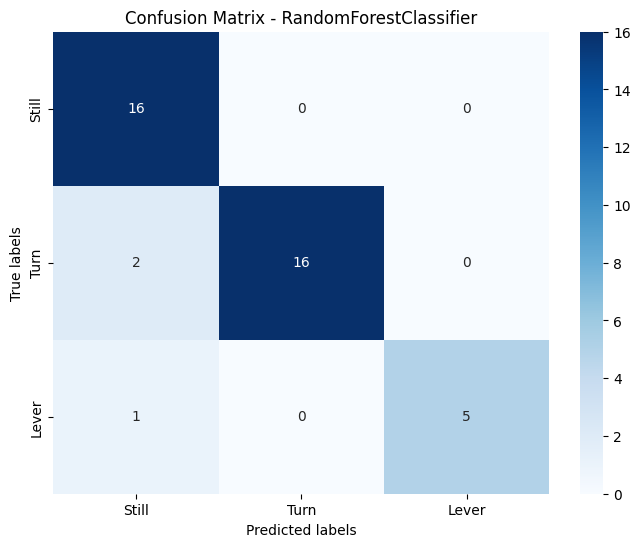

Feature Importance Ranking:
                              Feature  Importance
88   avg_abs_diff_accel_thumb_imu_yaw    0.053791
91         avg_abs_diff_accel_thumb_y    0.038496
38                    kurtosis_ring_z    0.032877
95         avg_abs_diff_accel_index_z    0.029319
116        time_between_peaks_index_z    0.027032
..                                ...         ...
131              avg_jerk_thumb_imu_x    0.000173
133              avg_jerk_thumb_imu_z    0.000000
29                   kurtosis_thumb_z    0.000000
37                    kurtosis_ring_y    0.000000
106    time_between_peaks_thumb_imu_y    0.000000

[152 rows x 2 columns]


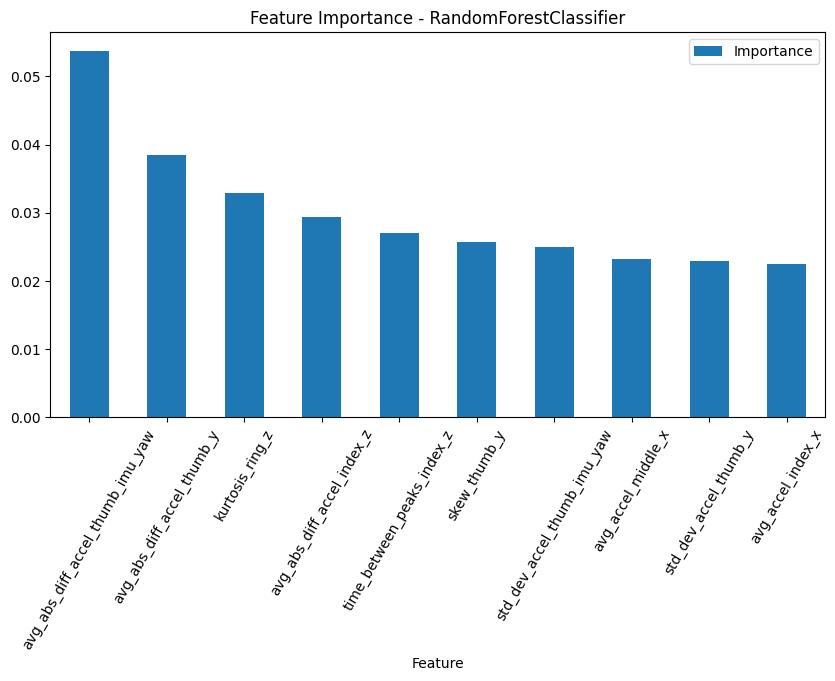


SVC
Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.94      0.97        18
           2       1.00      0.83      0.91         6

    accuracy                           0.95        40
   macro avg       0.96      0.93      0.94        40
weighted avg       0.96      0.95      0.95        40



/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


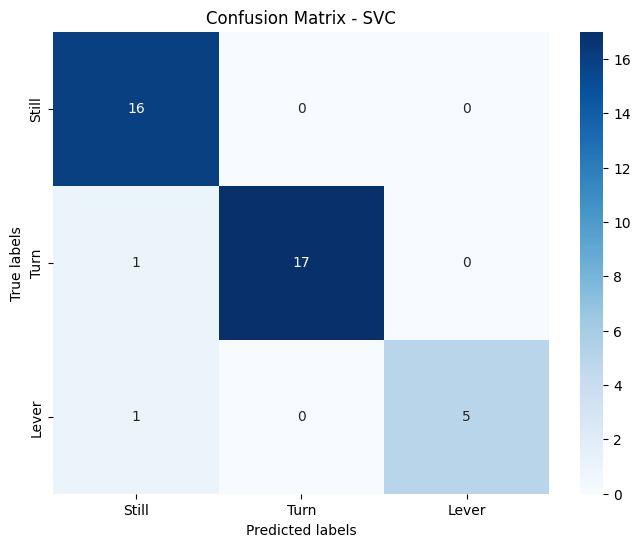

KNeighborsClassifier
Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.95      1.00      0.97        18
           2       1.00      0.83      0.91         6

    accuracy                           0.95        40
   macro avg       0.96      0.92      0.94        40
weighted avg       0.95      0.95      0.95        40



/opt/homebrew/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


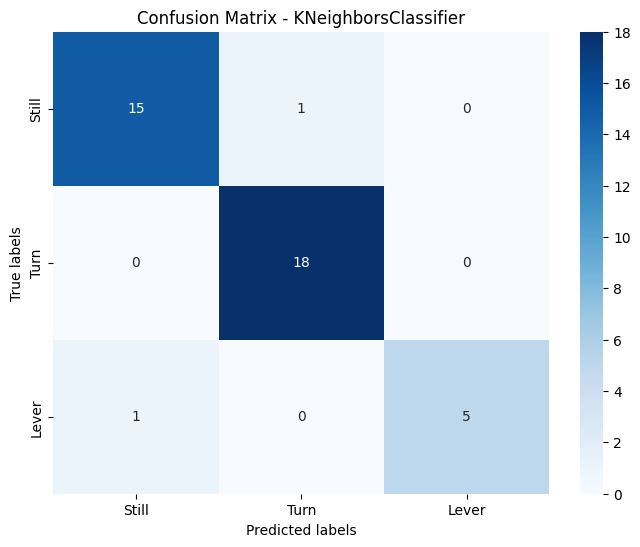

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
Accuracy: 0.925
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       1.00      0.94      0.97        18
           2       0.71      0.83      0.77         6

    accuracy                           0.93        40
   macro avg       0.88      0.91      0.89        40
weighted avg       0.93      0.93      0.93        40



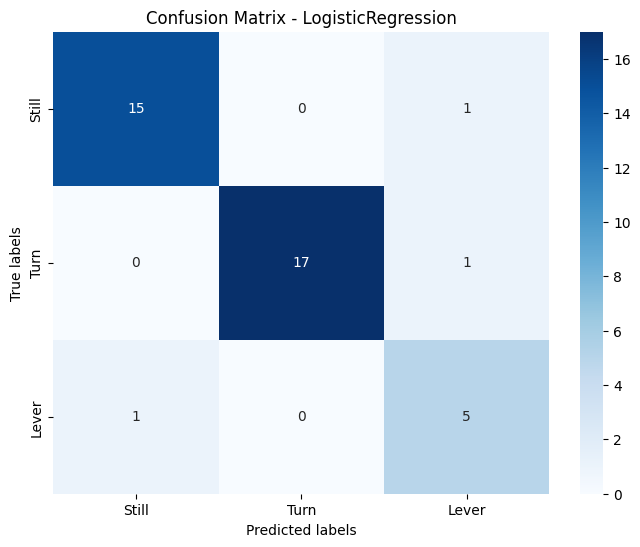

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import joblib

classifiers = [
    RandomForestClassifier(n_estimators=100),
    SVC(),
    KNeighborsClassifier(),
    LogisticRegression()
]

trained_models = []

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(type(classifier).__name__)
    print("Accuracy:", accuracy)
    print(report)

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Still', 'Turn', 'Lever'], yticklabels=['Still', 'Turn', 'Lever'])
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title(f"Confusion Matrix - {type(classifier).__name__}")
    plt.show()

    trained_models.append(classifier)  # Save the trained model for later use
    feature_names = list(X.columns)
    if isinstance(classifier, RandomForestClassifier):
        feature_importances = classifier.feature_importances_
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': feature_importances
        })
        importance_df = importance_df.sort_values(by='Importance', ascending=False)
        print("Feature Importance Ranking:")
        print(importance_df)
        # put the imporance df into a file named importance.txt
        importance_df.to_csv(f'importance_{type(classifier).__name__}.txt', index=False)
        # take the top 10 features and plot them
        importance_df = importance_df.head(10)
        # put the importance df in a bar chart for visualization
        importance_df.plot.bar(x='Feature', y='Importance',  rot=60, title=f'Feature Importance - {type(classifier).__name__}', figsize=(10, 5))
        plt.title(f'Feature Importance - {type(classifier).__name__}')
        plt.show()
        
        print()

# save the files using sklearn 

# Save the trained models
for i, model in enumerate(trained_models):
    joblib.dump(model, f'models/{type(model).__name__}_{i}.pkl')


In [22]:

# from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

# classifiers = [
#     RandomForestClassifier(n_estimators=100),
#     SVC(),
#     KNeighborsClassifier(),
#     LogisticRegression()
# ]

# for classifier in classifiers:
#     classifier.fit(X_train, y_train)
#     y_pred = classifier.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     report = classification_report(y_test, y_pred)
#     print(type(classifier).__name__)
#     print("Accuracy:", accuracy)
#     print(report)
#     print()

#     conf_matrix = confusion_matrix(y_test, y_pred)
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
#     plt.xlabel("Predicted labels")
#     plt.ylabel("True labels")
#     plt.title(f"Confusion Matrix - {type(classifier).__name__}")
#     plt.show()
#     # save the omdel
#     joblib.dump(classifier, f'models/{type(classifier).__name__}.pkl')
#     # perform PCA and feature importance rating 
#     # PCA
    

In [23]:
# export model
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(rf_clf, open(filename, 'wb'))




X_train_scaled.shape (159, 152)
X_train_scaled.shape[1] 152
Epoch 1/10
3/3 [==============================] - 0s 3ms/step - loss: 0.7505 - accuracy: 0.2704 - precision: 0.5000 - recall: 0.6292
Epoch 2/10
3/3 [==============================] - 0s 2ms/step - loss: 0.3910 - accuracy: 0.5094 - precision: 0.7184 - recall: 0.8315
Epoch 3/10
3/3 [==============================] - 0s 2ms/step - loss: 0.1302 - accuracy: 0.6478 - precision: 0.8431 - recall: 0.9663
Epoch 4/10
3/3 [==============================] - 0s 2ms/step - loss: -0.1099 - accuracy: 0.6855 - precision: 0.8969 - recall: 0.9775
Epoch 5/10
3/3 [==============================] - 0s 2ms/step - loss: -0.3456 - accuracy: 0.6918 - precision: 0.9062 - recall: 0.9775
Epoch 6/10
3/3 [==============================] - 0s 2ms/step - loss: -0.5753 - accuracy: 0.7107 - precision: 0.9355 - recall: 0.9775
Epoch 7/10
3/3 [==============================] - 0s 2ms/step - loss: -0.8424 - accuracy: 0.7107 - precision: 0.9355 - recall: 0.9775
Epoch

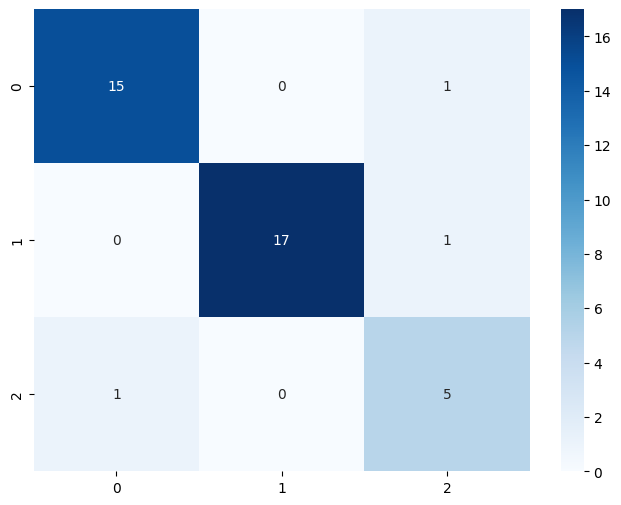

In [16]:
# upload model and do inference in real time 
# load the model from disk  

# load the model from disk

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assume X_train, X_test, y_train, y_test are your training and test sets

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("X_train_scaled.shape", X_train_scaled.shape)
# print number of features going into neural network
print("X_train_scaled.shape[1]", X_train_scaled.shape[1])

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    # tf.keras.layers.Dense(1, activation='sigmoid')
    # output layer should be 3 for the 3 classes
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall'])

# Train the model
# the batch size refers to the number of training examples utilized in one iteration
# in terms of accelerometers, this is the number of rows of data that are used to train the model at once
model.fit(X_train_scaled, y_train, epochs=10, batch_size=64) 
# model.fit(X_train_scaled, y_train, epochs=10, batch_size=32)
# Make predictions on the test set
# use the 
# print("y_pred", y_pred)

#  classifier.fit(X_train, y_train)
    # y_pred = classifier.predict(X_test)
    # accuracy = accuracy_score(y_test, y_pred)
    # report = classification_report(y_test, y_pred)
y_pred_proba = model.predict(X_test_scaled)
# we have 3 different classes, so we need to change the threshold to 0.33, 0.66, and 1.0
# y_pred = (y_pred_proba > 0.5).astype(int)  # Convert probabilities to binary predictions
# y_pred = (y_pred_proba > 0.66).astype(int)  # Convert probabilities to binary predictions
# y_pred = (y_pred_proba > 0.33).astype(int)  # Convert probabilities to binary predictions

print("Accuracy:", accuracy_score(y_test, y_pred))

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
# make a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report)


### Classification via SVM: This function will classify the data using SVM. It will return the accuracy of the model on the test data.

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Precision: 1.0
Recall: 1.0
F1-score: 1.0


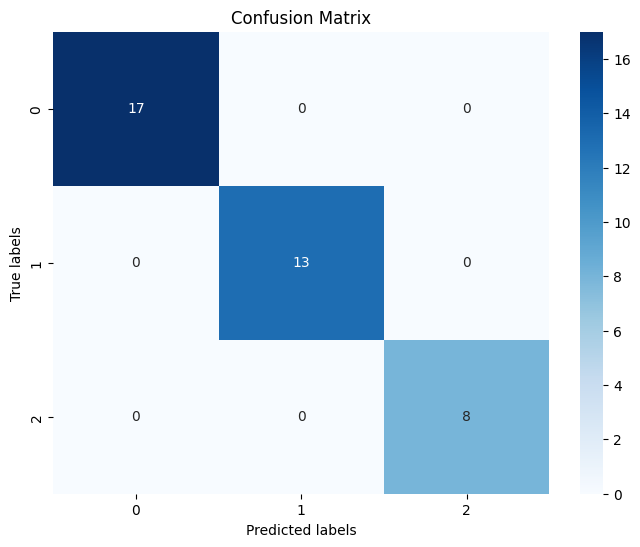

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as pl
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# Shuffle the data
final_data = final_data.sample(frac=1).reset_index(drop=True)

# Split the data into features (X) and target (y)
X = final_data.drop('label', axis=1)
y = final_data['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an SVM classifier
svm_clf = SVC()

# Train the classifier
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred = svm_clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print(classification_report)

# Additional scores
precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test, y_pred,average='micro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


In [26]:
# import pca
from sklearn.decomposition import PCA
# Assume that feature_names is a list of your feature names in the same order as in your training data
feature_names = ['feature1', 'feature2', 'feature3', ...]  # replace with your actual feature names

classifiers = [
    RandomForestClassifier(n_estimators=100),
    SVC(),
    KNeighborsClassifier(),
    LogisticRegression()
]

# Perform PCA
pca = PCA(n_components=2)  # adjust number of components as needed
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

for classifier in classifiers:
    # Train and evaluate model with PCA data
    classifier.fit(X_train_pca, y_train)
    y_pred = classifier.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(type(classifier).__name__)
    print("Accuracy:", accuracy)
    print(report)
    print()

    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title(f"Confusion Matrix - {type(classifier).__name__}")
    plt.show()

    # Save the model
    joblib.dump(classifier, f'models/{type(classifier).__name__}.pkl')

    # Feature importance rating (only applicable for RandomForestClassifier)
    



TypeError: 'str' object is not callable

In [ ]:
# classification via a convolutional neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'features' is your DataFrame and 'labels' is your target
X = features.values.reshape(-1, features.shape[1], 1)  # reshaping for CNN
y = final_data['label'] # Use 'label' as the target
y = pd.DataFrame(y).T

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CNN model
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape=X_train[0].shape))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, verbose=1)

# Evaluate the model
model.evaluate(X_test, y_test)


In [ ]:

# Plot IMU data
plot_data(imu_df, 'IMU Data')

# Plot accelerometer data
plot_data(new_dataframe, 'Accelerometer Data')

In [ ]:
# def extract_features(df, labels):
#     # Convert payload lists into a DataFrame
#     features = ['thumb_x', 'thumb_y', 'thumb_z', 'index_x', 'index_y', 'index_z', 
#             'middle_x', 'middle_y', 'middle_z', 'ring_x', 'ring_y', 'ring_z', 
#             'pinky_x', 'pinky_y', 'pinky_z']
#     accel_df = pd.DataFrame(df[features])
#     # Add labels to the DataFrame
#     # get hte label from the df
#     accel_df['label'] = labels
# #     print(accel_df['label'])

#     # Feature extraction
#     avg_accel = accel_df.groupby('label').mean()
#     std_dev_accel = accel_df.groupby('label').std()
#     avg_abs_diff_accel = accel_df.groupby('label').apply(lambda x: x.diff().abs().mean())
#     avg_accel_mag = accel_df.groupby('label').apply(lambda x: ((x**2).sum(axis=1)**0.5).mean())

# #     time_between_peaks = accel_df.groupby('label').apply(lambda x: x.apply(lambda y: np.mean(np.diff(np.where((np.diff(y > 0) & (y > np.mean(y))))))))
#     binned_distribution = accel_df.groupby('label').apply(lambda x: (np.histogram(x, bins=10)[0]).tolist())

#     # Combine all features into a single DataFrame
#     feature_data = pd.concat([avg_accel, 
#                               std_dev_accel, 
#                               avg_abs_diff_accel, 
#                               avg_accel_mag, 
#                         #       time_between_peaks,
#                               binned_distribution], axis=1)
#     return feature_data


# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report

# # show one entry of data_df
# # print(data_df)
# feature_df = extract_features(data_df, labels)
# # print(feature_df)

# # 'feature_df' is your DataFrame of features and 'label' is your target
# # X = feature_df.drop('label', axis=1)  # Use all columns except 'label' as features
# X = feature_df  # Use all columns except 'label' as features
# # print(feature_df[0])
# y = labels # Use 'label' as the target
# print(X)

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize a Random Forest classifier
# rf_clf = RandomForestClassifier(n_estimators=100)

# # Train the classifier
# rf_clf.fit(X_train, y_train)

# # Make predictions
# y_pred = rf_clf.predict(X_test)

# # Evaluate the classifier
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))


In [ ]:
# # Import pandas
# import pandas as pd

# # concatenate all the features 
# concatenated_features = pd.DataFrame.from_dict(avg_accel, orient='index', columns=['avg_accel'])
# concatenated_features = pd.concat([ #std_dev_accel,
#                                    # avg_abs_diff_accel_df,
#                                      avg_accel_mag_df, 
#                                       time_between_peaks_df, 
#                                    #   binned_distribution_df
#                                       ], axis=1)
# print(concatenated_features.head())
# Combine all features into a single DataFrame
# feature_data = pd.concat([
#     avg_accel, 
#     # std_dev_accel, 
#     # avg_abs_diff_accel_df, 
#     # avg_accel_mag_df, 
#     # time_between_peaks_df,
#     # binned_distribution_df
# ], axis=1)
# print("Feature Data\n", feature_data[0])
# panda_avg_accel = pd.DataFrame(avg_accel)
# type(panda_avg_accel)
# print(panda_avg_accel)
# p
# Check the combined DataFrame
# print(feature_data.head())